Det som skiljer sig från förra sekvensen till dennan, har ett annat format, denna sekvens sträcker sig mer än 1 rad. 


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def count_dna_letters(sequence):
#Räknar antalet förekomster av varje DNA-bokstav (A, C, G, T)
    dna_count = {'A': 0, 'T': 0, 'C': 0, 'G': 0}
    
    for letter in sequence:
        if letter.upper() in dna_count:#Returnerar bokstäverna till uppercase
            dna_count[letter.upper()] += 1#Ökar motsvarande värde med +1
    
    return dna_count

In [24]:
#Källor
import webbrowser
url = "https://pythonforbiologists.com/tutorial/files.html?form=MG0AV3"
url = "https://www.geeksforgeeks.org/bar-plot-in-matplotlib/"
webbrowser.open(url)

True

In [25]:
def plot_dna_letter_frequency(sequence_id, dna_count):
    #Plottar frekvensen av DNA-bokstäver i en stapelgraf
    letters = list(dna_count.keys())
    counts = list(dna_count.values())
    
    plt.figure(figsize=(8, 6))
    plt.bar(letters, counts, color=['red', 'blue', 'green', 'purple'])#Här bestämmer jag färgen på staplarna
    plt.title(f"DNA Letter Frequency for {sequence_id}")#Här bestämmer jag titel på grafen
    plt.xlabel("DNA Letters")#x-axeln
    plt.ylabel("Count")#y-axeln
    plt.show()

Annat format, läser in som TXT-fil
Sequence ID: seq1
DNA letter counts: {'A': 17, 'T': 7, 'C': 8, 'G': 2}


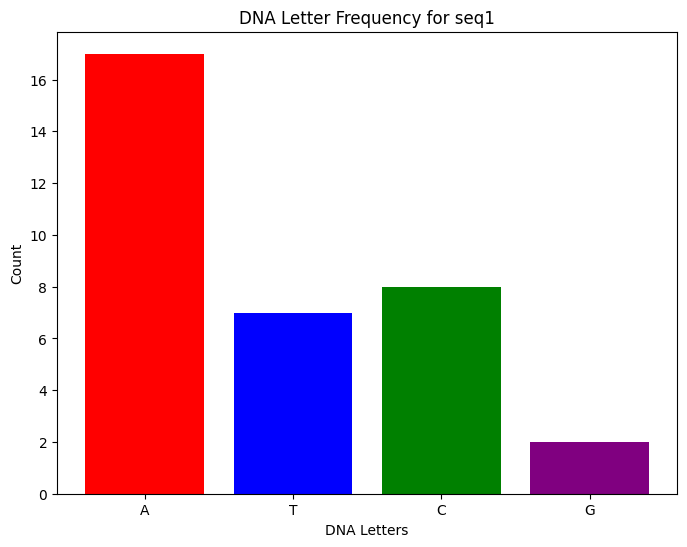

Sequence ID: seq2
DNA letter counts: {'A': 3, 'T': 7, 'C': 4, 'G': 10}


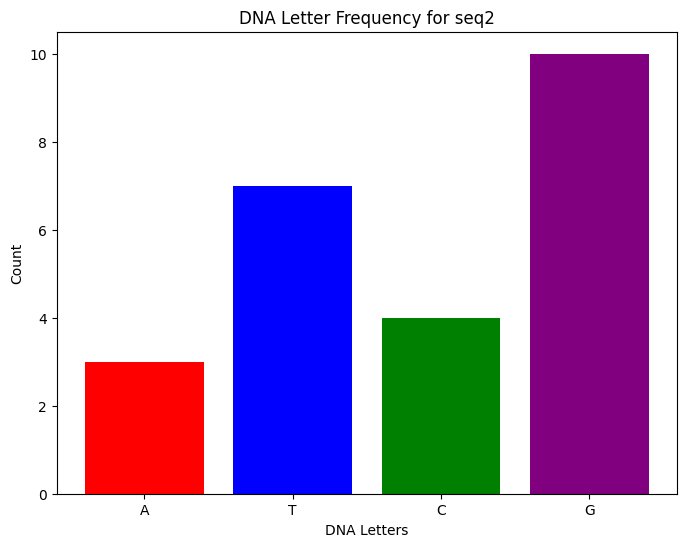

Sequence ID: seq3
DNA letter counts: {'A': 36, 'T': 19, 'C': 34, 'G': 21}


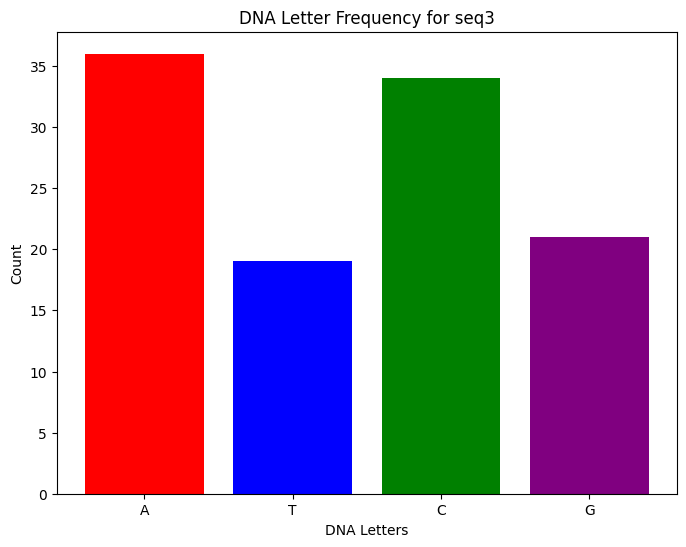

Sequence ID: seq4
DNA letter counts: {'A': 17, 'T': 12, 'C': 15, 'G': 20}


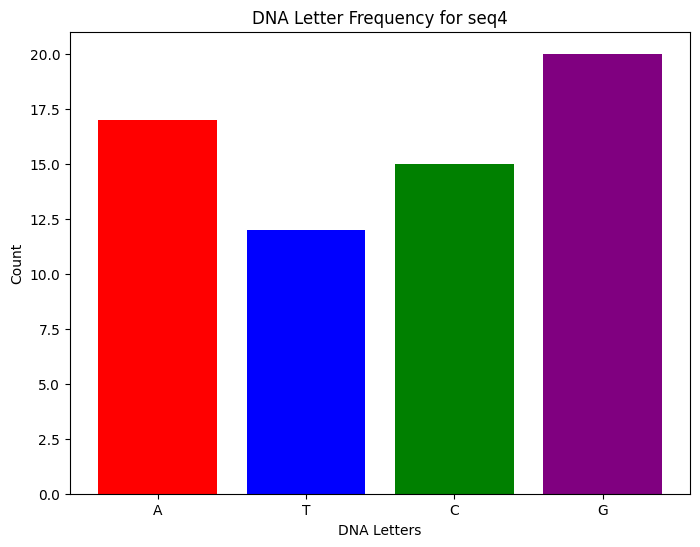

In [26]:
def process_dna_file(filename):# Här bearbetas DNA-sekvenser från den inlästa filen
    sequences = {}
    try:
        # Kollar om kolumnnamnen passar för CSV
        df = pd.read_csv(filename)
        if 'ID' in df.columns and 'seq' in df.columns:
            for _, row in df.iterrows():# Loopar igenom varje rad i DataFrame
                sequence_id = row['ID']# Hämtar värdet från kolumnen ID
                sequence = row['seq']# Hämtar värdet från kolumnen seq
                sequences[sequence_id] = sequence# Sparar värdet av sequence
        else:
            raise ValueError("CSV var inte korrekt")
    except Exception:
        print("Annat format, läser in som TXT-fil")
        with open(filename, 'r', encoding='utf-8') as file:
            current_id = None
            current_sequence = []
            for line in file:
                line = line.strip()
                if line.startswith(">"):# Med den funktionen börjar en ny sekvens
                    if current_id is not None:
                        sequences[current_id] = "".join(current_sequence)  # Sparar föregående sekvens
                    current_id = line[1:]# Tar bort > och sparar ID
                    current_sequence = []
                else:
                    current_sequence.append(line)# Lägger till en rad i sekvensen
            if current_id is not None:
                sequences[current_id] = "".join(current_sequence)
    
    return sequences# Lägg till en return här för att få tillbaka ordboken med sekvenserna

# Anropa funktionen för att läsa in DNA-sekvenser från filen
dna_filename = "dnasequencecomplicated.csv"# Byt till rätt filnamn
sequences = process_dna_file(dna_filename)
# Varje sekvens, räknar bokstäver och plottar
for sequence_id, sequence in sequences.items():
    dna_count = count_dna_letters(sequence)
    print(f"Sequence ID: {sequence_id}")
    print(f"DNA letter counts: {dna_count}")
    plot_dna_letter_frequency(sequence_id, dna_count)

